# Problem 1(Overfitting)

## (a.)

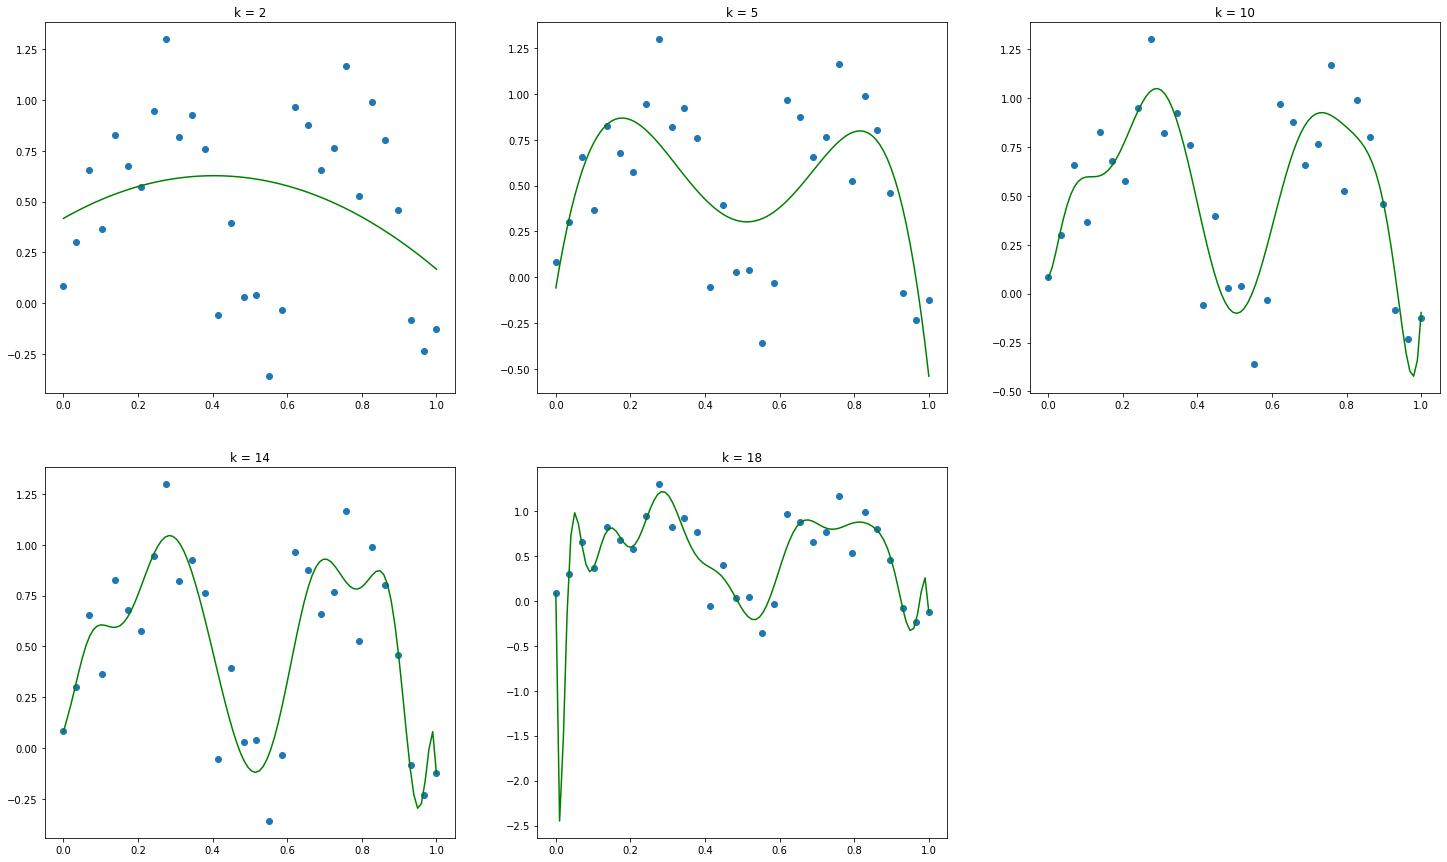

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import math

ssigma = 0.07
sigma = ssigma**0.5
miu = 0
pi = math.pi
ti = np.linspace(0, 1, 30)

sy = np.zeros(30)

N = np.random.normal(miu, sigma, 30)

for i in range(30):
    #N = 1/(((2*pi)**0.5)*sigma)*math.exp((-1/2)*((ti[i]-miu)/sigma)**2)
    g = math.sin(2*pi*ti[i])**2 + N[i]   # rand[i]/5 為雜訊
    sy[i] = g

xi = np.linspace(0, 1, 100)
k = [2, 5, 10, 14, 18]

label = ['k = 2', 'k = 5', 'k = 10', 'k = 14', 'k = 18']
plt.figure(figsize=(25,15))
j = 0
for i in k:
    model = np.poly1d(np.polyfit(ti, sy, i))
    plt.subplot(2, 3, j+1)
    plt.scatter(ti, sy)
    plt.plot(xi, model(xi), color='green')
    plt.title(label[j])
    j = j + 1
    
plt.show()

## (b.) 

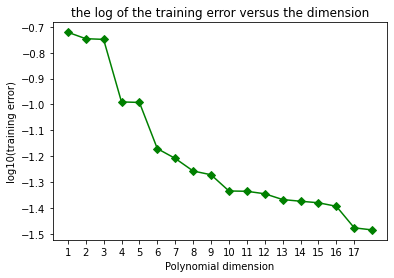

In [99]:

e = np.linspace(1, 18, num=18)
e_plot = np.zeros(18)
j = 0    
for i in range(1,19):  
    model = np.poly1d(np.polyfit(ti, sy, i))
    y_hat = model(ti)
    e_plot[j] = math.log(sum((sy - y_hat)**2)/30, 10)
    j += 1
    
#plt.bar(np.arange(3, 6), e)

plt.xticks(np.arange(1, 18))
plt.plot(e, e_plot, color='green', marker = "D")
plt.ylabel('log10(training error)')
plt.xlabel('Polynomial dimension')
plt.title('the log of the training error versus the dimension')
plt.show()


## (c.) 

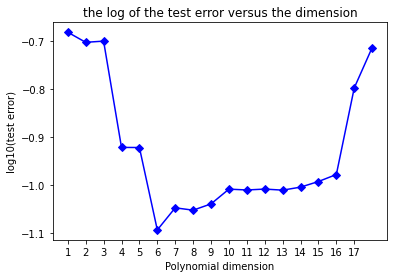

In [100]:
T = np.linspace(0, 1, 1000)

N2 = np.random.normal(miu, sigma, 1000)
sy2 = np.zeros(1000)

for i in range(1000):
    g = math.sin(2*pi*T[i])**2 + N2[i]   # rand[i]/5 為雜訊
    sy2[i] = g
    
    
e = np.linspace(1, 18, num=18)
e2_plot = np.zeros(18)
j = 0    
for i in range(1,19):  
    model = np.poly1d(np.polyfit(ti, sy, i))
    y_hat = model(T)
    e2_plot[j] = math.log(sum((sy2 - y_hat)**2)/1000, 10)
    j += 1


plt.xticks(np.arange(1, 18))
plt.plot(e, e2_plot, color='blue', marker = "D")
plt.ylabel('log10(test error)')
plt.xlabel('Polynomial dimension')
plt.title('the log of the test error versus the dimension')
plt.show()



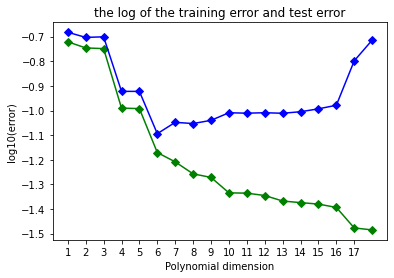

In [101]:
plt.xticks(np.arange(1, 18))
plt.plot(e, e_plot, color='green', marker = "D")
plt.plot(e, e2_plot, color='blue', marker = "D")
plt.ylabel('log10(error)')
plt.xlabel('Polynomial dimension')
plt.title('the log of the training error and test error')
plt.show()

## (d.) 

由上圖可發現，當Polynomial dimension上升，Training error越下降，Test error則是在dimension=7時，開始上升，且越高Polynomial dimension，error越上升，因此可知模型在k>6後overfitting。

## Problem 2 (AIC and BIC)

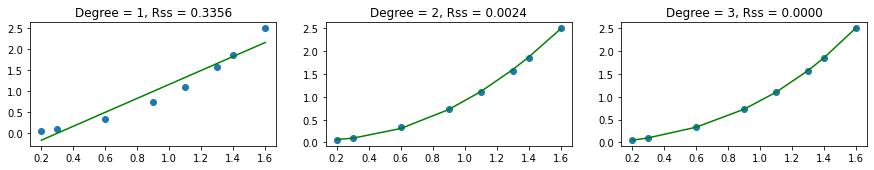

In [115]:
x = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]
y = [0.050446, 0.098426 ,0.33277 ,0.7266 ,1.0972 ,1.5697 ,1.8487 ,2.5015]
n = len(x)
xi = np.linspace(0.2, 1.6, 100)
AIC = np.zeros(3)
BIC = np.zeros(3)
j = 0
plt.figure(figsize=(15,5))
for i in range(1,4):
    model = np.poly1d(np.polyfit(x, y, i))   
    
    
    RSS = sum((y - model(x))**2)
    AIC[j]= n * math.log(RSS/n) + 2*i
    BIC[j]= n * math.log(RSS/n) + math.log(n)*i   
    plt.subplot(2, 3, i)
    plt.scatter(x, y)
    plt.title('Degree = '+ str(i)+', Rss = %.4f'%(RSS))
    
    plt.plot(x, model(x), color='green')
    j+=1


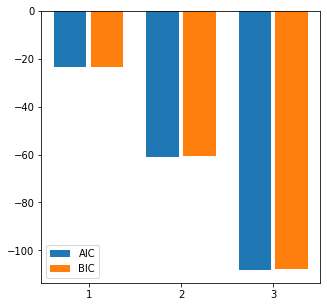

AIC:[ -23.37045659  -60.82771547 -108.16552236]
BIC:[ -23.29101505  -60.66883239 -107.92719773]


In [116]:
plt.figure(figsize=(5,5))
plt.bar(np.arange(3)+0.8, AIC[(np.arange(3))], width = 0.35, label='AIC')
plt.bar(np.arange(3)+1.2, BIC[(np.arange(3))], width = 0.35, label='BIC')
plt.xticks([1, 2, 3])
plt.legend()
plt.show()
print("AIC:{}".format(AIC))
print("BIC:{}".format(BIC))

由第一張圖可以觀察出Degree=3最Fit，再去細看此二數值，可以發現AIC和BIC數值在Degree=3時確實有最小值，故應選擇3rd order作為模型。

# Problem 3
![title](3a.png)
![title](3b.png)